In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams = mpl.rc_params_from_file("includes/mlprc")

In [7]:
import os
if not os.path.exists("plots"):
    os.makedirs("plots")

In [6]:
import numpy as np

from includes import utils
from includes import config
from includes import algorithms

In [ ]:
def evaluate_algorithm(train_set, test_set, algorithm, verbose, *args):
    if len(test_set) == 0:
        np.random.shuffle(train_set)
        
        train_set, test_set = np.split(train_set, [int(train_set.shape[0] * 0.7)])
        
    predicted, model = algorithm(train_set, test_set, verbose, *args)

    accuracy = np.mean(test_set[:, -1] == predicted) * 100

    return accuracy, model

In [ ]:
train_set, test_set, n_classes = utils.get_data("mnist")

In [ ]:
conf = config.Config(verbose=False)

In [ ]:
conf.set_algorithm("sft-reg")
accuracy, model = evaluate_algorithm(
    train_set,
    test_set,
    algorithms.softmax_regression,
    conf.verbose,
    conf.lr,
    n_classes,
    conf.n_epochs,
    conf.batch_size,
    conf.tol
)

print "Softmax Regression"
print "Accuracy: %s" % accuracy

In [ ]:
conf.set_algorithm("boosted-sft-reg")
accuracy, model = evaluate_algorithm(
    train_set,
    test_set,
    algorithms.boosted_softmax_regression,
    conf.verbose,
    conf.lr,
    n_classes,
    conf.n_epochs,
    conf.batch_size,
    conf.m_stop,
    conf.eta,
    "logistic",
    "plots/sft-data-logistic.npy"
)

print "Boosted Softmax Regression"
print "Final Test Accuracy: %s" % accuracy

In [ ]:
conf.set_algorithm("boosted-sft-reg")
for activation in ["logistic", "relu", "tanh", "identity"]:
    accuracy, model = evaluate_algorithm(
        train_set,
        test_set,
        algorithms.boosted_softmax_regression,
        conf.verbose,
        conf.lr,
        n_classes,
        conf.n_epochs,
        conf.batch_size,
        conf.m_stop,
        conf.eta,
        activation,
        "plots/sft-data-%s.npy" % activation
    )

    print "Boosted Softmax Regression, Activation = %s" % activation
    print "Final Test Accuracy: %f" % accuracy

In [ ]:
conf.set_algorithm("multi-mlp")
accuracy, model = evaluate_algorithm(
    train_set,
    test_set,
    algorithms.mlp,
    conf.verbose,
    conf.lr,
    n_classes,
    conf.n_epochs,
    conf.batch_size,
    conf.hidden_size,
    conf.tol
)

print "Multi Layer Perceptron"
print "Accuracy: %f" % accuracy

In [ ]:
conf.set_algorithm("multi-mlp")
for size in range(1, 30):
    accuracy, model = evaluate_algorithm(
        train_set,
        test_set,
        algorithms.mlp,
        True,
        conf.lr,
        n_classes,
        50,
        conf.batch_size,
        (size,),
        0.0001
    )

    print "Multi Layer Perceptron, size = %d" % size
    print "Accuracy: %f" % accuracy

In [10]:
colors = ["blue", "red", "green", "orange"]
activations = ["logistic", "relu", "tanh", "identity"]

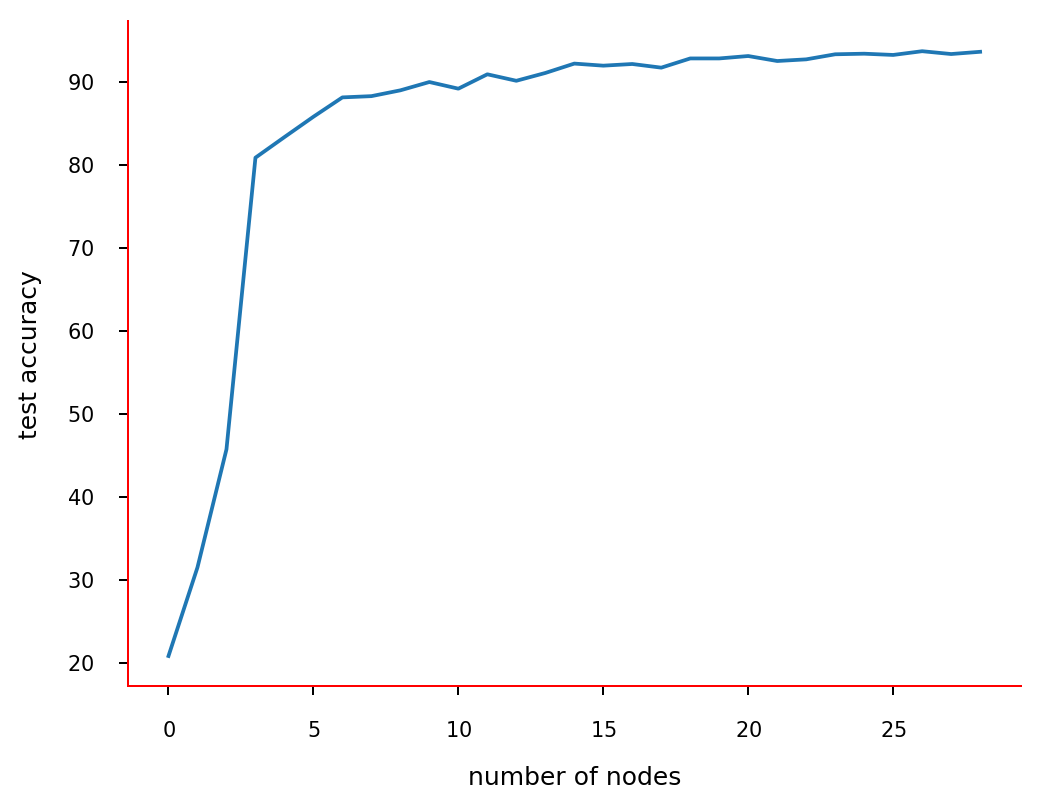

In [20]:
with open("../acc") as f:
    data = [float(line.strip()) for line in f]
plt.plot(data)
plt.xlabel("number of nodes")
plt.savefig("plots/temp.png", transparent=True)
plt.ylabel("test accuracy")
plt.show()

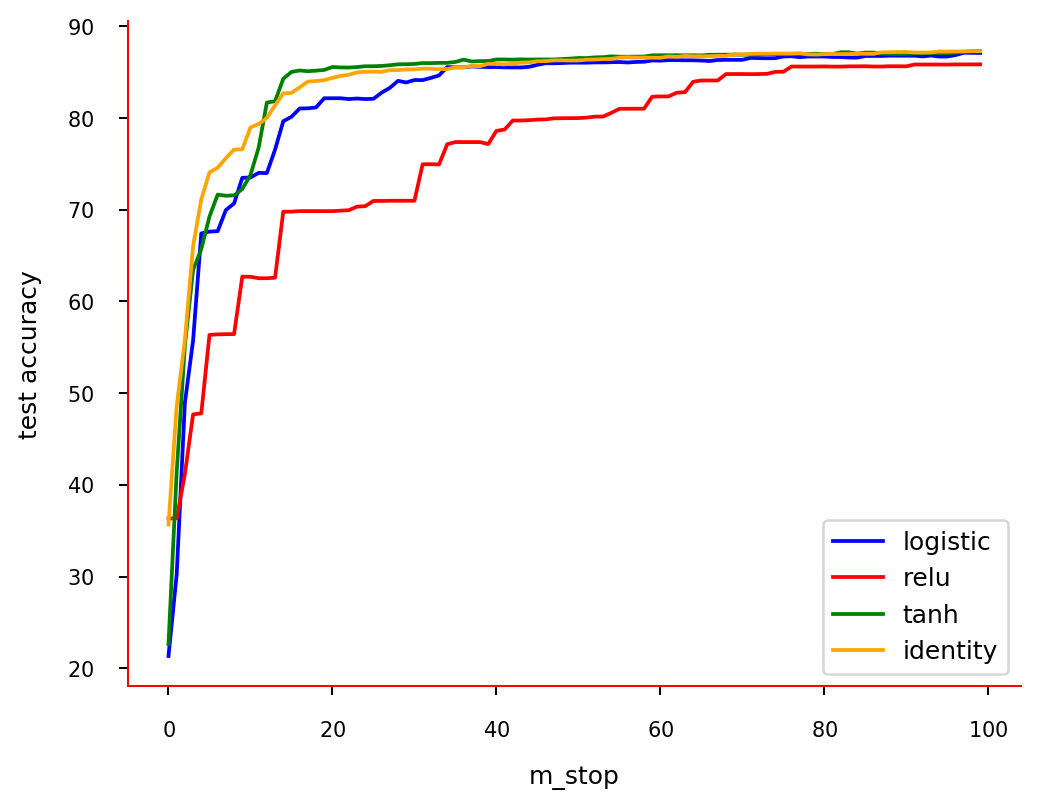

In [14]:
for color, activation in zip(colors, activations):
    data = np.load("plots/sft-data-%s.npy" % activation)
    plt.plot(data, label=activation, color=color)
    
plt.xlabel("m_stop")
plt.ylabel("test accuracy")
    
plt.legend()
plt.savefig("plots/plot.png", transparent=True)
plt.show()